In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()

In [40]:
l,m,Rb,r,th,ph,mu,Clm,Slm,r1,r2,r3,rho = \
symbols("ell,m,R_\mathscr{B},r,theta,phi,mu,C_\ell^m,S_\ell^m,r1,r2,r3,rho")

Define $U$ as the argument of the double summation of the perturbing potential term.  That is: $$\mathbf{f} = \boldsymbol\nabla \sum_{\ell=2}^\infty \sum_{m = 0}^\ell U$$

In [16]:
U = mu/r*(Rb/r)**l*assoc_legendre(l,m,cos(ph))*(Clm*cos(m*th)+ Slm*sin(m*th))
U

The spherical frame ($\mathcal{S}$) in which we'll carry out the gradient is a $C_2(\phi)C_3(\theta)$ rotation from the rotating, planet-fixed frame (e.g., Earth-Centered,Earth-Fixed frame) $\mathcal{G_B}$

In [12]:
SCGb = rotMat(2,ph)*rotMat(3,th)
SCGb

⎡cos(φ)⋅cos(θ)  sin(θ)⋅cos(φ)  -sin(φ)⎤
⎢                                     ⎥
⎢   -sin(θ)        cos(θ)         0   ⎥
⎢                                     ⎥
⎣sin(φ)⋅cos(θ)  sin(φ)⋅sin(θ)  cos(φ) ⎦

In [14]:
r_Gb = SCGb.transpose()*Matrix([0,0,r])
r_Gb

⎡r⋅sin(φ)⋅cos(θ)⎤
⎢               ⎥
⎢r⋅sin(φ)⋅sin(θ)⎥
⎢               ⎥
⎣   r⋅cos(φ)    ⎦

We will evaluate the specific perturbing force due to the geopotential using a proxy function $$R \triangleq \sum_{\ell=2}^\infty \sum_{m = 0}^\ell U$$

In [30]:
R = Function('R')(r,th,ph)
gradR = simplify(SCGb.transpose()*Matrix([diff(R,ph)/r, diff(R,th)/r/sin(ph), diff(R,r)]))
gradR

⎡                                                                       ∂             ⎤
⎢                                                                sin(θ)⋅──(R(r, θ, φ))⎥
⎢                ∂                              ∂                       ∂θ            ⎥
⎢r⋅sin(φ)⋅cos(θ)⋅──(R(r, θ, φ)) + cos(φ)⋅cos(θ)⋅──(R(r, θ, φ)) - ─────────────────────⎥
⎢                ∂r                             ∂φ                       sin(φ)       ⎥
⎢─────────────────────────────────────────────────────────────────────────────────────⎥
⎢                                          r                                          ⎥
⎢                                                                                     ⎥
⎢                                                                       ∂             ⎥
⎢                                                                cos(θ)⋅──(R(r, θ, φ))⎥
⎢                ∂                              ∂                       ∂θ            ⎥
⎢r⋅sin(φ)⋅sin(θ)⋅──(R(r, θ, φ)) 

In [48]:
fB_Gb = gradR.subs(sin(ph),rho/r).subs(cos(ph),r3/r).subs(sin(th),r2/rho).subs(cos(th),r1/rho)

Here are the three components of the specific perturbing force in the $\mathcal{G_B}$ frame:

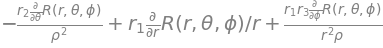

In [50]:
simplify(fB_Gb[0])

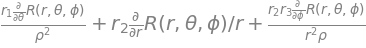

In [51]:
simplify(fB_Gb[1])

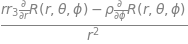

In [52]:
simplify(fB_Gb[2])

Finally, we need to evaluate the partials of $U$.  Each of these three terms should be interpreted as the argument to the original double summation.  That is, for the $R$ in the force expression above, $$\frac{\partial R}{\partial r} \equiv \sum_{\ell=2}^\infty \sum_{m = 0}^\ell \frac{\partial R}{\partial r}

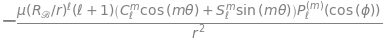

In [54]:
simplify(diff(U,r))

In [55]:
simplify(diff(U,th))

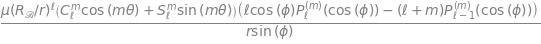

In [58]:
simplify(diff(U,ph))